<a href="https://colab.research.google.com/github/SubashKhatiwada/RSA-vs-ECC/blob/main/computational_geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Essential Packages

In [ ]:
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Creating Data Structure for Point

In [ ]:
class Point:
  x = 0
  y = 0

  def create(self):
    self.x = int(input('Input x coordinate value: '))
    self.y = int(input('Input y coordinate value: '))

  def setX(self,x):
    self.x = x

  def setY(self,y):
    self.y = y

  def getX(self):
    return self.x

  def getY(self):
    return self.y
p = Point()
p.create()
#showing in graph
plt.plot(p.getX(), p.getY(),'or')
plt.annotate("Point", (p.getX(), p.getY()))
plt.show()

# Creating Data Structure for Line Segment

In [ ]:

class LineSegment(Point):
  x1, y1, x2, y2 = 0, 0, 0, 0
  def create(self):
    startpoint = Point()
    endpoint = Point()
    print('Enter Start Point Value')
    startpoint.create()
    self.x1 = startpoint.getX()
    self.y1 = startpoint.getY()
    print("Enter End Point Value")
    endpoint.create()
    self.x2 = endpoint.getX()
    self.y2 = endpoint.getY()
  
  def getX(self):
    X = [self.x1, self.x2]
    return X
    
  def getY(self):
    Y = [self.y1, self.y2]
    return Y

line = LineSegment()
line.create()
X = line.getX()
Y = line.getY()
plt.plot(X, Y,'ko-')
plt.annotate("Start Point",(X[0], Y[0]))
plt.annotate("End Point",(X[1], Y[1

# Creating Data Structure for Ray

Enter Fixed Point Value
Input x coordinate value: 12
Input y coordinate value: 34
Enter a point from where line is passed through
Input x coordinate value: 77
Input y coordinate value: 89


Text(77, 89, 'Passing Point')

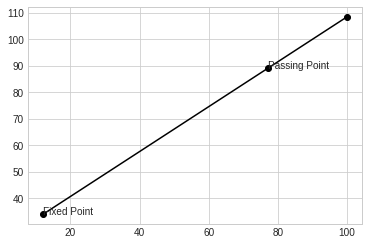

In [ ]:
class Ray(Point):
  x1, y1, x2, y2, x_max, y_max= 0, 0, 0, 0, 0, 0
  def create(self):
    fixedpoint = Point()
    passingpoint = Point()
  
    print('Enter Fixed Point Value')
    fixedpoint.create()
    self.x1 = fixedpoint.getX()
    self.y1 = fixedpoint.getY()
    print("Enter a point from where line is passed through")
    passingpoint.create()
    self.x2 = passingpoint.getX()
    self.y2 = passingpoint.getY()
    slope = (self.y2-self.y1)/(self.x2-self.x1)
    
    self.x_max = 100
    self.y_max = slope*(self.x_max-self.x2)+ self.y2

         
  def getX(self):
    X = [self.x1, self.x2, self.x_max]
    return X
    
  def getY(self):
    Y = [self.y1, self.y2, self.y_max]
    return Y

ray = Ray()
ray.create()
X = ray.getX()
Y = ray.getY()
plt.plot(X, Y,'ko-')
plt.annotate("Fixed Point",(X[0], Y[0]))
plt.annotate("Passing Point",(X[1], Y[1]))

# Implementation of Polygon

Input number of vertices:4
Input x coordinate value: 1
Input y coordinate value: 1
Input x coordinate value: 2
Input y coordinate value: 4
Input x coordinate value: 3
Input y coordinate value: 2
Input x coordinate value: 1
Input y coordinate value: 2
X coordinate list [1, 2, 3, 1]
Y coordinate list [1, 4, 2, 2]


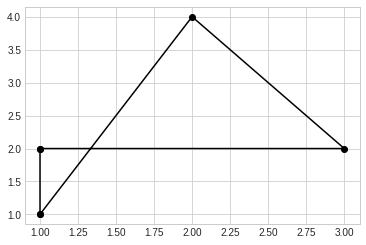

In [ ]:
class Polygon:
  n = int(input("Input number of vertices:"))
  x_list = [ ] 
  y_list = [ ]
  for i in range(0, int(n)):
    p = Point()
    p.create() 
    vert_x = p.getX()
    vert_y = p.getY()
    x_list.append(vert_x)
    y_list.append(vert_y)
  print('X coordinate list', x_list)
  print('Y coordinate list', y_list)    
  
  
  plt.plot(x_list, y_list,'ko-')
  plt.plot([x_list[0],x_list[n-1]],[y_list[0],y_list[n-1]],'ko-')
  plt.show
  

  # Example1:
  # number of vertices: 5
  # (2,2), (5,5), (10,2), (7,10), (2,13)
  # output: not convex polygon

  # Example 2:
  # number of vertices: 5
  # (-4,8) (2,2), (10,8), (7,15), (-10,16)
  # Output: convex polygon


# Implementation of Turn Test

In [ ]:
def turntest(x = [int, int, int], y= [int, int, int]):
  cross_product = (x[1]-x[0])*(y[2]-y[0])-(x[2]-x[0])*(y[1]-y[0])
  # print("cross product",cross_product)
  if cross_product > 0:
    turn = "left turn"
  elif cross_product < 0:
    turn = "right turn"
  elif cross_product == 0:
    turn = "colinear"
  print("turn test of point(", x[0],",", y[0], ")", ", ", "(", x[1],",", y[1], ")", "(", x[2],",", y[2], ")", "is", turn)
  return turn
  

# x_list = []
# y_list = []
# print("Input three points")
# for i in range(0,3):
#   p = Point()
#   p.create() 
#   vert_x = p.getX()
#   vert_y = p.getY()
#   x_list.append(vert_x)
#   y_list.append(vert_y)
# turntest(x_list, y_list)


# Checking whether polygon is convex or not

In [ ]:
def checkConvexity(x: list, y:list):
  n = len(x)
  right_flag = 0
  for i in range(0, n):
    if i == 0:
      turntest_result = turntest([x[n-1], x[i], x[i+1]], [y[n-1], y[i], y[i+1]])
    if i == n-1:
      turntest_result = turntest([x[0], x[i], x[i-1]], [y[0], y[i], y[i-1]])
    else:
      turntest_result = turntest([x[i-1], x[i], x[i+1]], [y[i-1], y[i], y[i+1]])
    if turntest_result == "right turn":
      right_flag = 1
      break
  if right_flag == 1:
    print("Given polygon is not convex polygon")
  else:
    print("Given polygon is convex")

#Example 2
checkConvexity([1, 3, 2, 1], [1, 2, 4, 2])

turn test of point( 1 , 2 ) ,  ( 1 , 1 ) ( 3 , 2 ) is left turn
turn test of point( 1 , 2 ) ,  ( 1 , 1 ) ( 3 , 2 ) is left turn
turn test of point( 1 , 1 ) ,  ( 3 , 2 ) ( 2 , 4 ) is left turn
turn test of point( 3 , 2 ) ,  ( 2 , 4 ) ( 1 , 2 ) is left turn
turn test of point( 1 , 1 ) ,  ( 1 , 2 ) ( 2 , 4 ) is right turn
Given polygon is not convex polygon


# Implementation of Intersection: Proper and Improper 

Input point A details:
Input x coordinate value: 1
Input y coordinate value: 1
Input point B details:
Input x coordinate value: 1
Input y coordinate value: 20
Input point C details:
Input x coordinate value: 1
Input y coordinate value: 15
Input point D details:
Input x coordinate value: 10
Input y coordinate value: 15
turn test of point( 1 , 1 ) ,  ( 1 , 20 ) ( 1 , 15 ) is colinear
turn test of point( 1 , 1 ) ,  ( 1 , 20 ) ( 10 , 15 ) is right turn
turn test of point( 1 , 15 ) ,  ( 10 , 15 ) ( 1 , 1 ) is right turn
turn test of point( 1 , 15 ) ,  ( 10 , 15 ) ( 1 , 20 ) is left turn
ABC is colinear
ABD is right turn
CDA is right turn
CDB is left turn
Line AB and CD are improper intersection


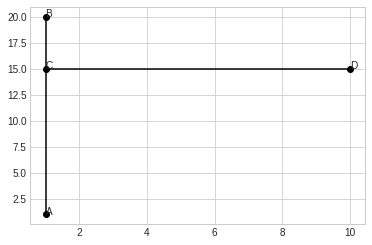

In [ ]:
def checkIntersection():
  print("Input point A details:")
  point_A = Point()
  point_A.create()
  A_x = point_A.getX()
  A_y = point_A.getY()
  print("Input point B details:")
  point_B = Point()
  point_B.create()
  B_x = point_B.getX()
  B_y = point_B.getY()
  print("Input point C details:")
  point_C = Point()
  point_C.create()
  C_x = point_C.getX()
  C_y = point_C.getY()
  print("Input point D details:")
  point_D = Point()
  point_D.create()
  D_x = point_D.getX()
  D_y = point_D.getY()
  abc = turntest([A_x,B_x,C_x], [A_y,B_y,C_y]) 
  abd = turntest([A_x,B_x,D_x], [A_y,B_y,D_y])
  cda = turntest([C_x,D_x,A_x], [C_y,D_y,A_y])
  cdb = turntest([C_x,D_x,B_x], [C_y,D_y,B_y])

  print("ABC is", abc)
  print("ABD is", abd)
  print("CDA is", cda)
  print("CDB is", cdb)

  if abc == "colinear" or abd == "colinear" or cda == "colinear" or cdb == "colinear" :
    # Between and Beyondness Check
    if ((A_x <= C_x <= B_x or A_x >= C_x >= B_x) and (A_y <= C_y <= B_y or A_y >= C_y >= B_y)) or ((A_x <= D_x <= B_x or A_x >= D_x >= B_x) and (A_y <= D_y <= B_y or A_y >= D_y >= B_y)) or ((C_x <= A_x <= D_x or C_x >= A_x >= D_x) and (C_y <= A_y <= D_y or C_y >= A_y >= D_y)) or ((C_x <= B_x <= D_x or C_x >= B_x >= D_x) and (C_y <= B_y <= D_y or C_y >= B_y >= D_y)):
      print("Line AB and CD are improper intersection")
    else:
      print("Line AB & CD do not intersect")
  else:
    if abc!=abd and cda!=cdb:
      print("Line AB & CD are proper intersection")
    else:
      print("Line AB & CD do not intersect")

  plt.plot([A_x,B_x], [A_y,B_y],'ko-')
  plt.annotate("A",(A_x, A_y))
  plt.annotate("B",(B_x, B_y))
  plt.plot([C_x,D_x], [C_y,D_y],'ko-')
  plt.annotate("C",(C_x, C_y))
  plt.annotate("D",(D_x, D_y))
  plt.show

# Example 1: 
# A = (2,2), B = (5,5) and C = (2,5), D = (5,2)
# Output: Proper Intersection

# Example 2:
# A = (2,7), B = (7,17) and C = (2,12), D = (5,13)
# Output: Improper Intersection

# Example 3: 
# A = (2,2), B = (10,10) and C = (-2,-2), D = (-10,-10)
# Output: do not intersect (Between and beyond)-

checkIntersection()



# Implementation of Convex Hull



Using extreme point elimination


In [ ]:
def findExtreme(x: list, y: list):
  # # Input from keyboard
  # n = int(input("Input the number of points:"))
  # for i in range(0,n):
  #   p = Point()
  #   p.create() 
  #   vert_x = p.getX()
  #   vert_y = p.getY()
  #   x.append(vert_x)
  #   y.append(vert_y)
  
  n = len(x)
  index_non_extreme_points = []
  for i in range(0, n):
    for j in range(0, n):
      if j!=i:
        for k in range(0, n):
          if k!=i and k!=j:
            for l in range(0, n):
              if l!=i and l!=j and l!=k:
                lij = turntest([x[l],x[i],x[j]],[y[l],y[i],y[j]])
                ljk = turntest([x[l],x[j],x[k]],[y[l],y[j],y[k]])
                lki = turntest([x[l],x[k],x[i]],[y[l],y[k],y[i]])

                if lij == ljk == lki:
                  index_non_extreme_points.append(l)

  index_non_extreme_points = list(dict.fromkeys(index_non_extreme_points))
  if len(index_non_extreme_points) == 0:
    print("There is not non extreme points")
  else:
    print("\nNon extreme point:")
    for i in range(0, len(index_non_extreme_points)):
     print("(",x[index_non_extreme_points[i]],",", y[index_non_extreme_points[i]], ")")

findExtreme([1, 10, 15, 12],[1 ,15,2,20])


turn test of point( 12 , 20 ) ,  ( 1 , 1 ) ( 10 , 15 ) is left turn
turn test of point( 12 , 20 ) ,  ( 10 , 15 ) ( 15 , 2 ) is left turn
turn test of point( 12 , 20 ) ,  ( 15 , 2 ) ( 1 , 1 ) is right turn
turn test of point( 15 , 2 ) ,  ( 1 , 1 ) ( 10 , 15 ) is right turn
turn test of point( 15 , 2 ) ,  ( 10 , 15 ) ( 12 , 20 ) is right turn
turn test of point( 15 , 2 ) ,  ( 12 , 20 ) ( 1 , 1 ) is left turn
turn test of point( 12 , 20 ) ,  ( 1 , 1 ) ( 15 , 2 ) is left turn
turn test of point( 12 , 20 ) ,  ( 15 , 2 ) ( 10 , 15 ) is right turn
turn test of point( 12 , 20 ) ,  ( 10 , 15 ) ( 1 , 1 ) is right turn
turn test of point( 10 , 15 ) ,  ( 1 , 1 ) ( 15 , 2 ) is left turn
turn test of point( 10 , 15 ) ,  ( 15 , 2 ) ( 12 , 20 ) is left turn
turn test of point( 10 , 15 ) ,  ( 12 , 20 ) ( 1 , 1 ) is left turn
turn test of point( 15 , 2 ) ,  ( 1 , 1 ) ( 12 , 20 ) is right turn
turn test of point( 15 , 2 ) ,  ( 12 , 20 ) ( 10 , 15 ) is left turn
turn test of point( 15 , 2 ) ,  ( 10 , 15 )

Using Graham Scan Algorithm

In [ ]:
import math
def graham_scan(X: list, Y: list):
  n = len(X)
  angle_list = [1000]
  stack_x = []
  stack_y = []

  print("Given points are:\n", list(zip(X,Y)), "\n")

  #sorting the point based y-cordinate
  P = sorted(zip(X, Y), key=lambda x:x[1])
  tuples = zip(*P)
  X, Y = [ list(tuple) for tuple in  tuples]
  
  #calculating polar angle from initial point
  for i in range (1,n):
    v1_theta = math.atan2(X[0],Y[0])
    v2_theta = math.atan2(X[i], Y[i])
    angle = (v2_theta - v1_theta) * (180.0 / math.pi)
    if angle < 0:
      angle % 360
    angle_list.append(angle)

  #algularly sorting with respect to initial point
  Q = sorted(zip(X, Y, angle_list), key = lambda x:x[2], reverse = True)
  tuples = zip(*Q)
  X, Y, angle_list = [list(tuple) for tuple in  tuples]
  print("Angularly sorted list is:\n",list(zip(X,Y)), "\n")

  # Push Q[0] and Q[1] into stack
  stack_x.append(X[0]), stack_y.append(Y[0])
  stack_x.append(X[1]), stack_y.append(Y[1])
  print("Initially, points in stack S:\n", list(zip(stack_x,stack_y)), "\n")

  for i in range(2,n):
    top = len(stack_x)
    print("\n****************for i=",i,"***************************")
    turn_test = turntest([stack_x[top-2], stack_x[top-1], X[i]], [stack_y[top-2], stack_y[top-1], Y[i]])
    if  turn_test == "left turn":
      print("push (", X[i], Y[i],") into stack")
      stack_x.append(X[i]), stack_y.append(Y[i])
      print("points in stack S:", list(zip(stack_x,stack_y)), "\n")
    while turntest != "left turn":
      top = len(stack_x)
      print("pop (", stack_x[top-1], stack_y[top-1],") into stack")
      stack_x.pop(), stack_y.pop()
      print("points in stack S:", list(zip(stack_x,stack_y)), "\n")
      top = len(stack_x)
      turn_test = turntest([stack_x[top-2], stack_x[top-1], X[i]], [stack_y[top-2], stack_y[top-1], Y[i]])
      if  turn_test == "left turn":
        print("push (", X[i], Y[i],") into stack")
        stack_x.append(X[i]), stack_y.append(Y[i])
        print("points in stack S:", list(zip(stack_x,stack_y)), "\n")
        break  
  print("\nconvex hull points are:", list(zip(stack_x,stack_y)))

graham_scan([2, 10, 1, 4, 15, 12],[1 ,5 ,10 ,6 ,2 , 11])


Given points are:
 [(2, 1), (10, 5), (1, 10), (4, 6), (15, 2), (12, 11)] 

Angularly sorted list is:
 [(2, 1), (15, 2), (10, 5), (12, 11), (4, 6), (1, 10)] 

Initially, points in stack S:
 [(2, 1), (15, 2)] 


****************for i= 2 ***************************
turn test of point( 2 , 1 ) ,  ( 15 , 2 ) ( 10 , 5 ) is left turn
push ( 10 5 ) into stack
points in stack S: [(2, 1), (15, 2), (10, 5)] 

pop ( 10 5 ) into stack
points in stack S: [(2, 1), (15, 2)] 

turn test of point( 2 , 1 ) ,  ( 15 , 2 ) ( 10 , 5 ) is left turn
push ( 10 5 ) into stack
points in stack S: [(2, 1), (15, 2), (10, 5)] 


****************for i= 3 ***************************
turn test of point( 15 , 2 ) ,  ( 10 , 5 ) ( 12 , 11 ) is right turn
pop ( 10 5 ) into stack
points in stack S: [(2, 1), (15, 2)] 

turn test of point( 2 , 1 ) ,  ( 15 , 2 ) ( 12 , 11 ) is left turn
push ( 12 11 ) into stack
points in stack S: [(2, 1), (15, 2), (12, 11)] 


****************for i= 4 ***************************
turn test of p